In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

The training set contains 784 columns for (28x28) grayscale images and 1 columns for label

In [2]:
print(len(train.columns))
print(train.columns[2])

785
pixel1


In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Preprocess Data

Reshape the train and test datasets to 28x28

In [4]:
X_train = np.expand_dims(np.reshape(np.array(train[train.columns[1:]].iloc[:]), (-1, 28, 28)), -1)
X_test = np.expand_dims(np.reshape(np.array(test[test.columns[0:]].iloc[:]), (-1, 28, 28)), -1)
print(X_train.shape, X_test.shape)

(42000, 28, 28, 1) (28000, 28, 28, 1)


### Visualize all Training Labels

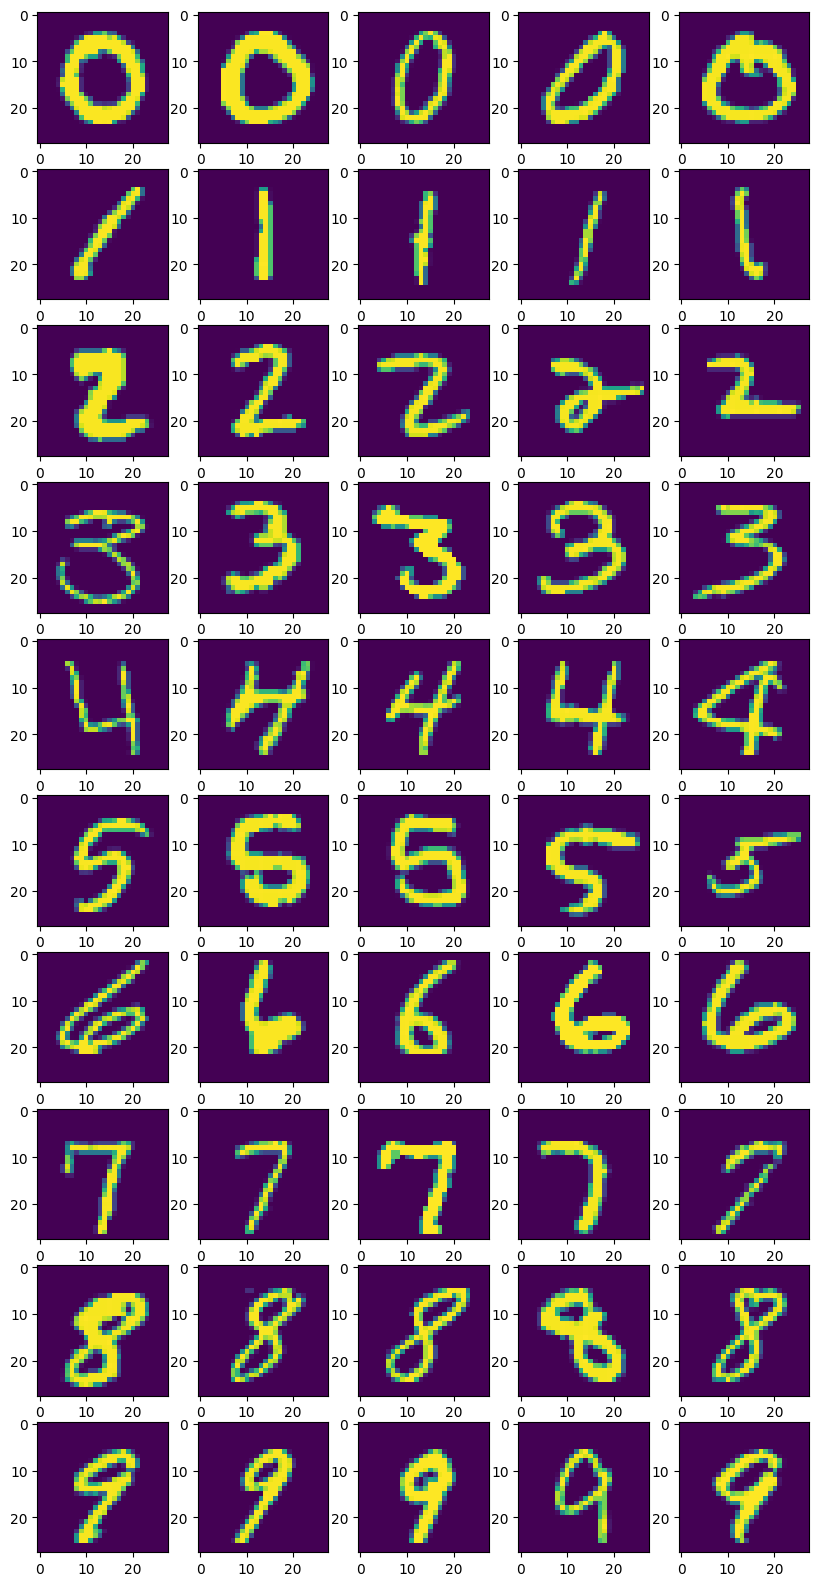

In [5]:
fig, axis = plt.subplots(10,5,figsize=(10, 20))
for label in range(0,10):
    ids = train.index[train['label'] == label]
    for j in range(0,5):
        axis[label,j].imshow(X_train[ids[j]])


Rescale all the images by dividing by 255

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
TRAIN_VALID_SPLIT = 0.9
SHUFFLE_BUFFER_SIZE = 5000
BATCH_SIZE = 64

## Prepare Datasets for Training and Testing

Split the train Dataset into train and validation

In [8]:
# Splitting all labels in 90:10 ratio
train_idx = []
valid_idx = []
for label in range(0,10):
    ids = list(train.index[train['label'] == label])
    np.random.shuffle(ids)
    split_idx = int(TRAIN_VALID_SPLIT*len(ids))
    train_idx.extend(ids[:split_idx])
    valid_idx.extend(ids[split_idx:])
len(train_idx), len(valid_idx)

(37794, 4206)

In [9]:
np.random.shuffle(train_idx)
np.random.shuffle(valid_idx)

In [10]:
x = X_train
X_train = x[train_idx]
y_train = np.array(train['label'][train_idx])
X_valid = x[valid_idx]
y_valid = np.array(train['label'][valid_idx])

In [11]:
import tensorflow as tf

In [12]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
validation_dataset = tf.data.Dataset.from_tensor_slices((X_valid, y_valid))

In [13]:
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.batch(BATCH_SIZE)

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (4,4), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [27]:
# Training model
history = model.fit(train_dataset,
                    epochs=20,
                    validation_data=validation_dataset)

Epoch 1/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.7936 - loss: 0.6390 - val_accuracy: 0.9727 - val_loss: 0.1011
Epoch 2/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9652 - loss: 0.1119 - val_accuracy: 0.9817 - val_loss: 0.0658
Epoch 3/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9730 - loss: 0.0872 - val_accuracy: 0.9822 - val_loss: 0.0593
Epoch 4/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9755 - loss: 0.0738 - val_accuracy: 0.9860 - val_loss: 0.0515
Epoch 5/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9787 - loss: 0.0642 - val_accuracy: 0.9855 - val_loss: 0.0489
Epoch 6/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9817 - loss: 0.0588 - val_accuracy: 0.9874 - val_loss: 0.0426
Epoch 7/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9828 - loss: 0.0526 - val_accuracy: 0.9867 - val_loss: 0.0396
Epoch 8/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9848 - loss: 0.0465 - val_accuracy: 

Plotting training loss and validation loss vs epoch 

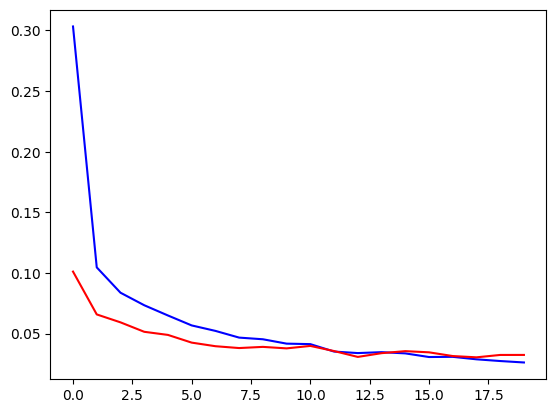

In [28]:
plt.plot(history.epoch, history.history['loss'], color='blue', label='Training Loss')
plt.plot(history.epoch, history.history['val_loss'], color='red', label='Validation Loss')

## Predictions on test dataset

In [32]:
test_prob = model.predict(X_test)
test_prob.shape

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


(28000, 10)

In [33]:
predictions = np.argmax(test_prob, axis=-1)
predictions.shape

(28000,)

In [38]:
dframe = pd.DataFrame({'ImageId': np.array(test.index)+1, 'Label':predictions})
dframe.set_index('ImageId', inplace=True)
dframe.head()

,Label
ImageId,
1,2
2,0
3,9
4,0
5,3


In [39]:
dframe.to_csv('predictions.csv')

Model produces prediction accuracy of 0.99296 